# Author: _Ashish Sinha_
### Branch: Metallurgical and Materials Engg.
### Year: 2
### Enrollment No.: 16118017
### E-Mail: [ashishsinha108@gmail.com](mail-to:ashishsinha108@gmail.com)
### Mobile: +91 8797 465 974

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.plotly as py

In [3]:
data=pd.read_csv('ship_data.csv')

In [4]:
data.head(10)

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0
5,6,3,Megan Clarkson,male,NaN,0,0,8458.3,Chicago,0
6,7,1,Molly Bower,male,54.0,0,0,51862.5,New York,0
7,8,3,Steven Jones,male,2.0,3,1,21075.0,New York,0
8,9,3,Bernadette Vance,female,27.0,0,2,11133.3,New York,1
9,10,2,Irene Chapman,female,-20.0,1,0,30070.8,Los Angeles,1


## Data Exploration

## We Check for missing values if any

In [5]:
data.isnull().sum()

Passenger ID        0
Class               0
Name                0
Gender              0
Age               177
Siblings Count      0
Parents Count       0
Fare                0
Embarked            2
Survived            0
dtype: int64

#### The `Name` and `Passenger ID` are not useful for any prediction. So I'll drop them

In [6]:
data.drop(['Name','Passenger ID'],axis=1,inplace=True)

In [7]:
def categorizer(data,column):
    classified={}
    unique_val=data[column].unique()
    for val in unique_val:
        classified[val]=len(data[data[column]==val])
    return classified

## Q1. Counting Passengers Gender Wise

In [8]:
gender=categorizer(data,'Gender')

In [9]:
for i in gender:
    print "{key} Passengers: {value}".format(key=i,value=gender[i])

male Passengers: 577
female Passengers: 314


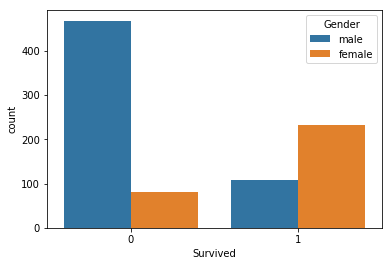

In [12]:
sns.countplot(x='Survived',data=data,hue='Gender')

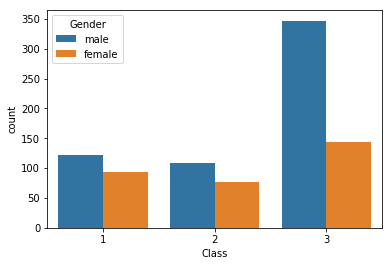

In [13]:
sns.countplot(x='Class',data=data,hue='Gender')

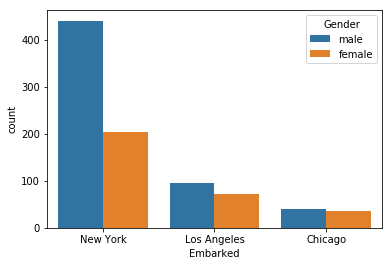

In [14]:
sns.countplot(x='Embarked',data=data,hue='Gender')

In [15]:
group=[]
for i in data['Age']:
    if i<16:
        group.append('child')
    elif i>=16 and i<=50:
        group.append('adult')
    else:
        group.append('senior')
data['Age Group']=pd.Series(group)

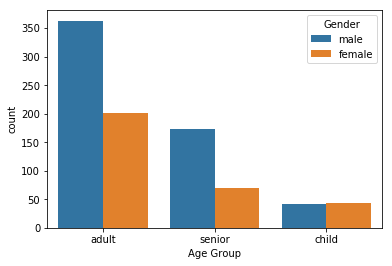

In [16]:
sns.countplot(x='Age Group',data=data,hue='Gender')

## Q2. Counting Passengers  On The Basis Of Class

In [17]:
passenger_class=categorizer(data,'Class')

In [18]:
for i in passenger_class:
    print "Passengers of Class {key}: {value}".format(key=i,value=passenger_class[i])

Passengers of Class 1: 216
Passengers of Class 2: 184
Passengers of Class 3: 491


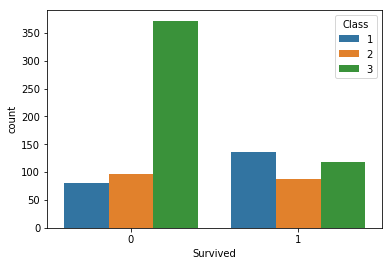

In [19]:
sns.countplot(x='Survived',data=data,hue='Class')

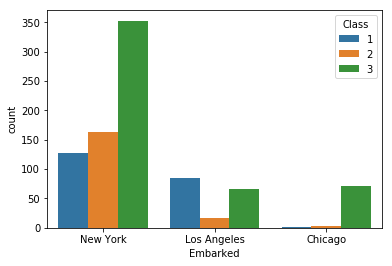

In [20]:
sns.countplot(x='Embarked',data=data,hue='Class')

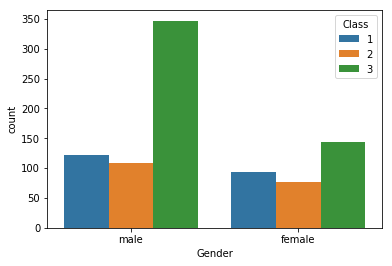

In [21]:
sns.countplot(x='Gender',data=data,hue='Class')

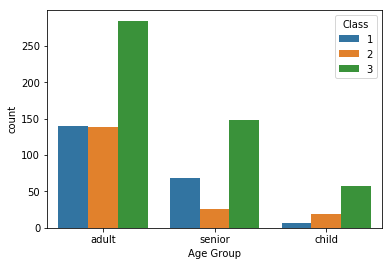

In [22]:
sns.countplot(x='Age Group',data=data,hue='Class')

## Q3. Counting the No. Of Children

The *Age* feature has missing values. So I'll impute them with the Mean Age

On checking age, we see that Some values are negative, which can't be. So these entry error must be rectified

In [23]:
data['Age']=np.abs(data['Age'])

In [24]:
avg_age=round(np.mean(data['Age']),1)
print 'The Average Age is: ',avg_age

The Average Age is:  30.1


In [25]:
data['Age'].fillna(avg_age,inplace=True)

In [26]:
children=data[data['Age']<16]

In [27]:
print 'No. OF Children: ',len(children)

No. OF Children:  83


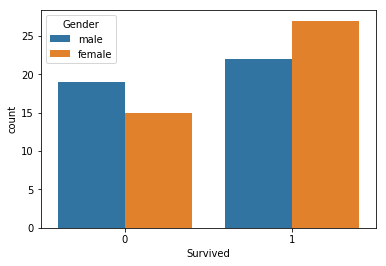

In [28]:
sns.countplot(x='Survived',data=children,hue='Gender')


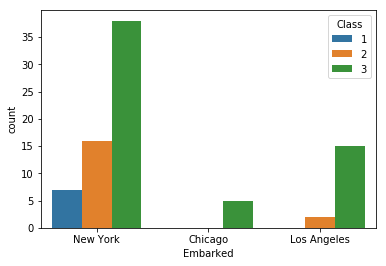

In [29]:
sns.countplot(x='Embarked',data=children,hue='Class')

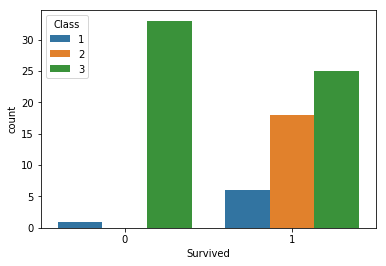

In [30]:
sns.countplot(x='Survived',data=children,hue='Class')

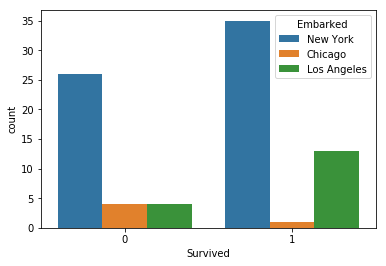

In [31]:
sns.countplot(x='Survived',data=children,hue='Embarked')

## Q4. Children in Various Passenger Class

In [32]:
children_class=categorizer(children,'Class')

In [33]:
for i in children_class:
    print "Children in Class {key}: {value}".format(key=i,value=children_class[i])

Children in Class 1: 7
Children in Class 2: 18
Children in Class 3: 58


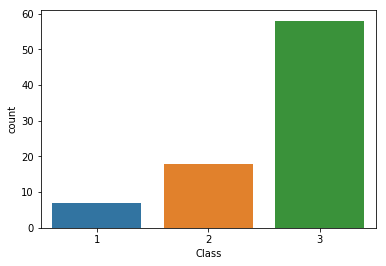

In [35]:
sns.countplot(x='Class',data=children)

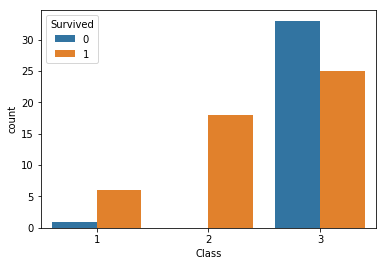

In [36]:
sns.countplot(x='Class',data=children,hue='Survived')

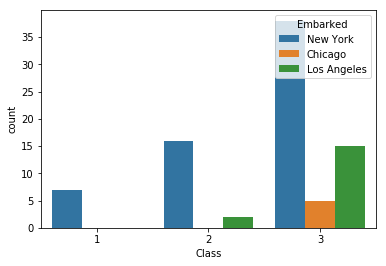

In [37]:
sns.countplot(x='Class',data=children,hue='Embarked')

## Q5. I have already dealt with the missing Values for `Age`

##### But There are still some values in `Embraked`

In [38]:
data.isnull().sum()

Class             0
Gender            0
Age               0
Siblings Count    0
Parents Count     0
Fare              0
Embarked          2
Survived          0
Age Group         0
dtype: int64

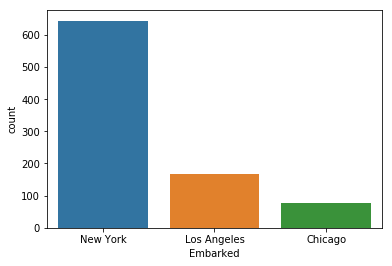

In [39]:
sns.countplot(x='Embarked',data=data)

We see that Most of the people are from `New York`. 
So we will impute Missing value with it.

In [40]:
data.Embarked.fillna('New York',inplace=True)

In [41]:
data.isnull().sum()

Class             0
Gender            0
Age               0
Siblings Count    0
Parents Count     0
Fare              0
Embarked          0
Survived          0
Age Group         0
dtype: int64

```So, now there are no missing values.
WE will now Encode the categorical Values
```

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
features=['Embarked','Gender','Age Group']
le=LabelEncoder()
for feature in features:
    data[feature]=le.fit_transform(data[feature])

In [44]:
data.head(10)

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived,Age Group
0,3,1,22.0,1,0,7250.0,2,0,0
1,1,0,38.0,1,0,71283.3,1,1,0
2,3,0,26.0,0,0,7925.0,2,1,0
3,1,0,35.0,1,0,53100.0,2,1,0
4,3,1,35.0,0,0,8050.0,2,0,0
5,3,1,30.1,0,0,8458.3,0,0,2
6,1,1,54.0,0,0,51862.5,2,0,2
7,3,1,2.0,3,1,21075.0,2,0,1
8,3,0,27.0,0,2,11133.3,2,1,0
9,2,0,20.0,1,0,30070.8,1,1,1


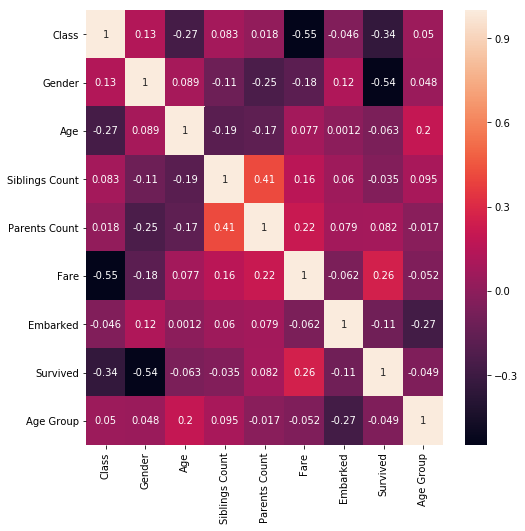

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

## Q6. Passengers Who were Alone

In [46]:
data['Family']=data['Parents Count']+data['Siblings Count']

In [47]:
data['Family'].loc[data['Family'] > 0] = 'With Family'
data['Family'].loc[data['Family'] == 0] = 'Alone'

/home/ashish/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
alone=categorizer(data,'Family')

In [49]:
for i in alone:
    print 'Passenger who are {key}: {value}'.format(key=i,value=alone[i])

Passenger who are Alone: 537
Passenger who are With Family: 354


## Q7. Passengers	survived	in	each	Class

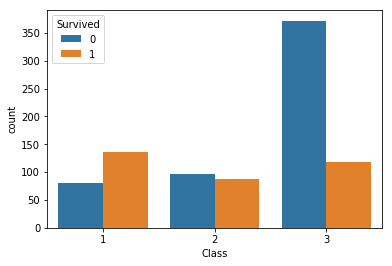

In [50]:
sns.countplot(x='Class',data=data,hue='Survived')

In [51]:
survivors=data[data['Survived']==1]
class_survivors=categorizer(survivors,'Class')

In [52]:
for i in class_survivors:
    print "{value} passengers survived in class {key}".format(key=i,value=class_survivors[i])

136 passengers survived in class 1
87 passengers survived in class 2
119 passengers survived in class 3


In [53]:
for i in class_survivors:
    print "{value}% passengers survived in class {key}".format(key=i,value=round(float(class_survivors[i])/len(survivors)*100,2))

39.77% passengers survived in class 1
25.44% passengers survived in class 2
34.8% passengers survived in class 3


## Q8. % of Passenger Survived on Gender Basis

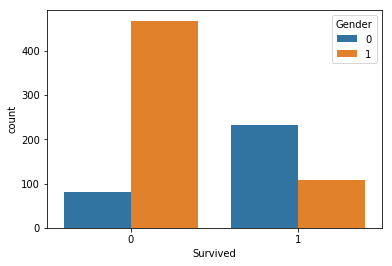

In [54]:
#male=1, female=0
sns.countplot(x='Survived',data=data,hue='Gender')

In [55]:
gender_survivors=categorizer(survivors,'Gender')

In [56]:
print "{value}% passengers survived were {key}".format(key='Female',value=round(float(gender_survivors[0])/len(survivors)*100,2))
print "{value}% passengers survived were {key}".format(key='Male',value=round(float(gender_survivors[1])/len(survivors)*100,2))

68.13% passengers survived were Female
31.87% passengers survived were Male


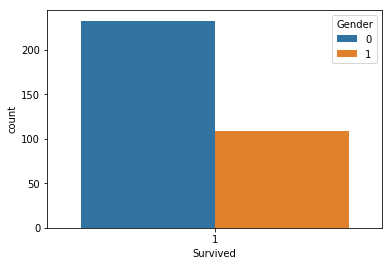

In [57]:
#male=1, female=0
sns.countplot(x='Survived',data=survivors,hue='Gender')

## Q9. Most of the Passengers who were Alone, didn't __survive__.

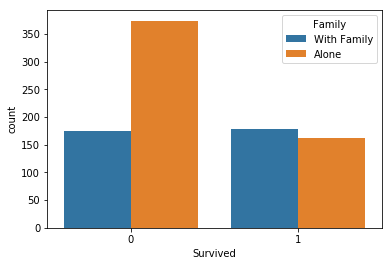

In [58]:
sns.countplot(x='Survived',data=data,hue='Family')

In [59]:
alone_passengers=data[data['Family']=='Alone']

In [60]:
alone_survivors=categorizer(alone_passengers,'Survived')

In [61]:
alone_survivors

{0: 374, 1: 163}

In [63]:
print "%0.2f of The Passengers who were ALONE didn't Survive"%(float(alone_survivors[0])/len(alone_passengers)*100)
print "%0.2f of The Passengers who were ALONE Survived"%(float(alone_survivors[1])/len(alone_passengers)*100)

69.65 of The Passengers who were ALONE didn't Survive
30.35 of The Passengers who were ALONE Survived


In [64]:
family_passengers=data[data['Family']=='With Family']
family_survivors=categorizer(family_passengers,'Survived')

In [65]:
print "{value}% passengers who were With Family didn't Survive.".format(value=round(float(family_survivors[0])/len(family_passengers)*100,2))
print "{value}% passengers who were With Family Survived".format(value=round(float(family_survivors[1])/len(family_passengers)*100,2))

49.44% passengers who were With Family didn't Survive.
50.56% passengers who were With Family Survived


### Therefore, Having a Family Member improved the chances of Survival

## Q10. Building Pipeline With All Features

In [60]:
data['Family']=le.fit_transform(data['Family'])

In [61]:
data['Fare per Person']=data['Fare']/(data['Family']+1.0)

In [62]:
#Splitting Data in train and test
y=data['Survived']
data.drop(['Survived'],inplace=True,axis=1)
X=data

In [ ]:
data.drop(['Fare'],axis=1,inplace=True)


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score,auc,roc_curve,roc_auc_score

In [92]:
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [93]:
#LogisticRegression
lr.fit(X_train,y_train)
preds=lr.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)


accuracy_score: 0.793296089385
Mean: 0.792146610756


In [94]:
roc_auc_score(y_test,preds)

0.77992277992277992

In [113]:
#GradientBoostingClassifier
gbc.fit(X_train,y_train)
preds=gbc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(gbc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.832402234637
Mean: 0.821566207242


0.82123552123552124

In [97]:
#DecisionTreeClassifier
dtc.fit(X_train,y_train)
preds=dtc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(dtc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)

accuracy_score: 0.776536312849
Mean: 0.758470996589


In [98]:
roc_auc_score(y_test,preds)

0.76763191763191752

In [99]:
#SVC
svc.fit(X_train,y_train)
preds=svc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(svc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.620111731844
Mean: 0.651692159603


0.55649935649935656

In [ ]:
#RandomForestClassifier
rf_params = {
    'n_jobs': -1,
    'n_estimators': 200
}
rfc=RandomForestClassifier(**rf_params)
rfc.fit(X_train,y_train)
preds=rfc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(rfc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.837988826816


## Best Model is Gradient Boosting Classifier when All Features are Used

In [103]:
gb_params = {
    'n_estimators': 300,
}
#GradientBoostingClassifier
gbc=GradientBoostingClassifier(**gb_params)
gbc.fit(X_train,y_train)
preds=gbc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(gbc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.837988826816
Mean: 0.806221268493


0.83198198198198203

In [104]:
importances=rfc.feature_importances_

In [119]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [88]:
data.head()

,Class,Gender,Age,Siblings Count,Parents Count,Embarked,Age Group,Family,Fare per Person
0,3,1,22.0,1,0,2,0,1,3625.00
1,1,0,38.0,1,0,1,0,1,35641.65
2,3,0,26.0,0,0,2,0,0,7925.00
3,1,0,35.0,1,0,2,0,1,26550.00
4,3,1,35.0,0,0,2,0,0,8050.00


In [108]:
X_new=data[['Gender','Fare per Person','Age','Class']]

In [109]:
X_new.head()

,Gender,Fare per Person,Age,Class
0,1,3625.00,22.0,3
1,0,35641.65,38.0,1
2,0,7925.00,26.0,3
3,0,26550.00,35.0,1
4,1,8050.00,35.0,3


In [117]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=42,test_size=0.2)
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [118]:
#LogisticRegression
lr.fit(X_train,y_train)
preds=lr.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.776536312849
Mean: 0.78234655166


0.76563706563706557

In [112]:
#GradientBoostingClassifier
gbc.fit(X_train,y_train)
preds=gbc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(gbc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.832402234637
Mean: 0.820167605843


0.82123552123552124

In [114]:
#DecisionTreeClassifier
dtc.fit(X_train,y_train)
preds=dtc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(dtc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.798882681564
Mean: 0.758500684212


0.7906692406692406

In [115]:
#SVC
svc.fit(X_train,y_train)
preds=svc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(svc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.620111731844
Mean: 0.651692159603


0.55649935649935656

In [116]:
#RandomForestClassifier
rf_params = {
    'n_jobs': -1,
    'n_estimators': 200
}
rfc=RandomForestClassifier(**rf_params)
rfc.fit(X_train,y_train)
preds=rfc.predict(X_test)
print 'accuracy_score:',accuracy_score(y_test,preds)
scores=cross_val_score(rfc,X_train,y_train,scoring='accuracy',cv=5)
print 'Mean:',np.mean(scores)
roc_auc_score(y_test,preds)

accuracy_score: 0.826815642458
Mean: 0.787980494184


0.81846846846846844